In [137]:
# 모듈 생성
import csv
import platform
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [2]:
%pwd 

'C:\\hcb\\pandas_study\\week4\\TeamProject'

In [3]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0AA0-A41A

 C:\hcb\pandas_study\week4\TeamProject 디렉터리

2022-07-20  오전 08:28    <DIR>          .
2022-07-20  오전 08:28    <DIR>          ..
2022-07-20  오전 08:28    <DIR>          .ipynb_checkpoints
2022-07-20  오전 02:53            79,160 4주차_팀플.ipynb
2022-07-20  오전 02:52    <DIR>          data
2022-07-20  오전 02:42            21,585 flight_staff.ipynb
2022-07-20  오전 02:48             2,446 sightseeing.ipynb
2022-07-20  오전 08:28               862 teamproject_week4.ipynb
2022-07-20  오전 02:50             6,708 Untitled.ipynb
               5개 파일             110,761 바이트
               4개 디렉터리  172,239,761,408 바이트 남음


### 연간 국제 유가 데이터 file

In [319]:
inter_oil_price_year = pd.read_csv('./data/inter_oil_price_year.csv', encoding='utf-8')
inter_oil_price_year.columns
inter_oil_price_year
# inter_oil_price_year['유가']

,연도,유가
0,12,715.837538
1,13,716.119679
2,14,635.935833
3,15,361.830046
4,16,315.390772
5,17,376.262744
6,18,475.866206
7,19,451.288213
8,20,307.388137
9,21,501.496667


### 연도별 국제 항공수송실적 file

In [5]:
inter_air_trans = pd.read_csv('./data/inter_air_trans_year_01.csv', encoding='euc_kr')
print(inter_air_trans.columns)
inter_air_trans.head()

Index(['구분', '여객(명)', '여객킬로(Km)', '화물(톤)', '화물톤킬로(Km)', '운항(회)', '운항킬로(Km)'], dtype='object')


,구분,여객(명),여객킬로(Km),화물(톤),화물톤킬로(Km),운항(회),운항킬로(Km)
0,1989,"8,283,164","29,795,423,539","711,295","4,268,280,900","44,219","212,959,283"
1,1990,"9,626,415","36,405,075,593","776,759","4,554,913,269","53,442","249,721,301"
2,1991,"10,270,666","38,521,435,036","787,342","4,470,003,436","59,927","267,728,140"
3,1992,"11,257,011","45,220,452,753","837,215","4,968,222,114","66,363","307,090,481"
4,1993,"11,651,345","47,627,320,253","950,574","6,182,815,941","68,615","324,066,393"


In [6]:
# 필요없는 행과 열 삭제
inter_air_trans.drop(['여객킬로(Km)','화물톤킬로(Km)','운항킬로(Km)'], axis=1, inplace=True)
inter_air_trans.drop(labels=range(0, 23), axis = 0, inplace=True)
inter_air_trans

,구분,여객(명),화물(톤),운항(회)
22,2011,"42,648,549","3,238,105","280,568"
23,2012,"47,702,644","3,208,780","313,726"
24,2013,"50,986,891","3,246,253","338,988"
25,2014,"56,778,759","3,410,742","366,485"
26,2015,"61,434,404","3,518,772","388,008"
27,2016,"73,000,810","3,780,908","438,856"
28,2017,"76,955,719","4,031,516","457,099"
29,2018,"85,925,288","4,168,783","497,089"
30,2019,"90,385,640","4,015,987","528,243"
31,2020,"14,239,922","3,070,993","167,211"


In [54]:
# 유가 컬럼 추가
inter_oil_price_year = inter_oil_price_year.drop(10)
aa = inter_oil_price_year['유가'].tolist()
inter_air_trans['유가'] = aa

In [15]:
# 컬럼명 수정
inter_air_trans.rename({'구분':'연도','유가': '유가(원/배럴)'}, axis=1, inplace=True)

In [17]:
# 인덱스 정리
inter_air_trans_1 = inter_air_trans.set_index('연도')
inter_air_trans = inter_air_trans_1.reset_index()

In [55]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개),유가
0,2012,47702644,3208780,313726,716.12,46920,715.837538
1,2013,50986891,3246253,338988,635.94,49732,716.119679
2,2014,56778759,3410742,366485,361.83,53777,635.935833
3,2015,61434404,3518772,388008,315.39,56915,361.830046
4,2016,73000810,3780908,438856,376.26,58591,315.390772
5,2017,76955719,4031516,457099,475.87,59995,376.262744
6,2018,85925288,4168783,497089,451.29,62045,475.866206
7,2019,90385640,4015987,528243,307.39,62957,451.288213
8,2020,14239922,3070993,167211,501.50,62212,307.388137
9,2021,3208695,3420163,131442,799.83,68773,501.496667


### 연간 등록 숙박시설 file

In [273]:
stay_regit_year_2021 = pd.read_csv('./data/stay_regit_year_2021.csv', encoding='euc_kr', skiprows=3)
stay_regit_year_2021.drop(['Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], axis=1, inplace=True)
stay_regit_year_2021

,Unnamed: 0,Unnamed: 1,소계,호텔업,휴양콘도미니엄업,관광펜션업,한옥체험업,외국인도시민박업,계,일반숙박업,생활숙박업,농어촌민박업,유스호스텔,휴양펜션업,Unnamed: 14
0,2012년\n(12.31기준),업체수,"2,036",786,180,297,516,257,"26,319","25,453",866,"18,398",108,59,"46,920"
1,NaN,(%),4.3,NaN,NaN,NaN,NaN,NaN,56.1,NaN,NaN,39.2,0.2,0.1,100.0
2,NaN,객실수,"126,760","82,209","38,971","2,640","2,255",685,"577,186","557,209","19,977","68,219","10,959",504,"783,628"
3,NaN,(%),16.2,NaN,NaN,NaN,NaN,NaN,73.7,NaN,NaN,8.7,1.4,0.1,99.9
4,2013년\n(12.31기준),업체수,"2,666",896,192,332,695,551,"26,828","25,659","1,169","20,047",112,79,"49,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,NaN,객실수,"33,889","23,871","9,105",913,-,-,"26,872","20,426","6,446","12,429",917,913,"75,020"
431,2020년\n(12.31.기준),업체수,422,363,59,-,-,-,835,649,186,"4,484",19,108,"5,868"
432,NaN,객실수,"29,228","20,195","9,033",-,-,-,"27,419","20,295","7,124","12,566",917,932,"71,062"
433,2021년\n(12.31.기준),업체수,423,362,60,-,1,-,866,647,219,"4,750",17,110,"6,166"


In [20]:
# 필요한 자료를 얻기 위해 컬럼 정리
stay_regit_year_2021 = stay_regit_year_2021.iloc[0:40:4]

In [21]:
# 컬럼명 정리
stay_regit_year_2021 = stay_regit_year_2021.rename({'Unnamed: 0':'연도','Unnamed: 1':'업체수','계':'소계','Unnamed: 14':'총계'}, axis=1)
stay_regit_year_2021

# 인덱스 정리
stay_regit_year_2021 = stay_regit_year_2021.set_index('연도')
stay_regit_year_2021 = stay_regit_year_2021.reset_index()

In [22]:
# 10년치 연도 리스트 담아둔 것
ten_year = []
for i in range(2012, 2022):
    ten_year.append(str(i))
ten_year

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [25]:
# 연도 컬럼 정리
stay_regit_year_2021['연도'] = ten_year

# 총계 컬럼만 떼어 내야겠다고 판단
stay_regit_year_2021_total = stay_regit_year_2021['총계']

In [26]:
# 총계(업체수) 컬럼 추가
inter_air_trans['총 업체수'] = stay_regit_year_2021_total

In [29]:
# 컬럼명 정리
inter_air_trans = inter_air_trans.rename({'총 업체수':'숙박 업체수(개)'}, axis=1)
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,"47,702,644","3,208,780","313,726",716.119679,"46,920"
1,2013,"50,986,891","3,246,253","338,988",635.935833,"49,732"
2,2014,"56,778,759","3,410,742","366,485",361.830046,"53,777"
3,2015,"61,434,404","3,518,772","388,008",315.390772,"56,915"
4,2016,"73,000,810","3,780,908","438,856",376.262744,"58,591"
5,2017,"76,955,719","4,031,516","457,099",475.866206,"59,995"
6,2018,"85,925,288","4,168,783","497,089",451.288213,"62,045"
7,2019,"90,385,640","4,015,987","528,243",307.388137,"62,957"
8,2020,"14,239,922","3,070,993","167,211",501.496667,"62,212"
9,2021,"3,208,695","3,420,163","131,442",799.833350,"68,773"


In [30]:
# 데이터들 타입 정리
inter_air_trans['여객(명)'] = inter_air_trans['여객(명)'].str.replace(',','').astype('int')
inter_air_trans['화물(톤)'] = inter_air_trans['화물(톤)'].str.replace(',','').astype('int')
inter_air_trans['운항(회)'] = inter_air_trans['운항(회)'].str.replace(',','').astype('int')
inter_air_trans['숙박 업체수(개)'] = inter_air_trans['숙박 업체수(개)'].str.replace(',','').astype('int')

In [32]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,716.119679,46920
1,2013,50986891,3246253,338988,635.935833,49732
2,2014,56778759,3410742,366485,361.830046,53777
3,2015,61434404,3518772,388008,315.390772,56915
4,2016,73000810,3780908,438856,376.262744,58591
5,2017,76955719,4031516,457099,475.866206,59995
6,2018,85925288,4168783,497089,451.288213,62045
7,2019,90385640,4015987,528243,307.388137,62957
8,2020,14239922,3070993,167211,501.496667,62212
9,2021,3208695,3420163,131442,799.833350,68773


In [56]:
# 정리된 DF, csv로 저장 => 소수의 경우, 소수점 2번째까지 나타나도록 파일을 내보냄
inter_air_trans.to_csv('C:\hcb\pandas_study\week4\TeamProject\data\inter_air_trans_fin.csv', index=False, float_format = '%.2f')

In [45]:
# 이외 다른 파일들 전처리 과정은 한군데 몰아서 실시, csv 파일로 보낸 것들 불러오기

### 남은 파일 불러오기 (업체별 항공 통계, 국내 항공 운송 현황 file)

In [170]:
sightseeing = pd.read_csv('./data/sightseeing_fin.csv', encoding='utf-8')
inter_air_trans_2 = pd.read_csv('./data/inter_air_trans_2_fin.csv', encoding='utf-8')

In [279]:
inter_air_trans_2

,구 분,구 분.1,2017년 06월,2018년 06월,2019년 06월,2020년 06월,2021년 06월,2022년 06월
0,운항(편),국내,16606,16578,16519,14756,18660,18544
1,운항(편),국제,36462,40568,44658,7586,10845,13219
2,운항(편),계,53068,57146,61177,22342,29505,31763
3,여객(명),국내,2852858,2829036,2814523,2161147,3037489,3328076
4,여객(명),국제,5977385,6993670,7727595,182053,246697,1279029
5,여객(명),계,8830243,9822706,10542118,2343200,3284186,4607105
6,화물(톤),국내,22570,21360,19830,12998,16919,18927
7,화물(톤),국제,324712,340264,330019,219341,282981,273269
8,화물(톤),계,347282,361624,349849,232339,299900,292196


In [296]:
# inter_air_trans_2_01 = inter_air_trans_2.iloc[0::3]     # 운항/여객/화물 국내 이동량
# inter_air_trans_2_02 = inter_air_trans_2.iloc[1::3]     # 운항/여객/화물 국제 이동량
# inter_air_trans_2_03 = inter_air_trans_2.iloc[2::3]     # 운항/여객/화물 총계 이동량

# 불필요 컬럼 삭제
# inter_air_trans_2_01.drop(['구 분.1'], axis=1, inplace=True)
# inter_air_trans_2_02.drop(['구 분.1'], axis=1, inplace=True)
# inter_air_trans_2_03.drop(['구 분.1'], axis=1, inplace=True)

# 컬럼명 수정
# inter_air_trans_2_01 = inter_air_trans_2_01.rename({'구 분':'연도'}, axis=1)
# inter_air_trans_2_02 = inter_air_trans_2_02.rename({'구 분':'연도'}, axis=1)
# inter_air_trans_2_03 = inter_air_trans_2_03.rename({'구 분':'연도'}, axis=1)

In [303]:
# 행, 열 전환으로 연도를 인덱스로 지정
inter_air_trans_2_01 = inter_air_trans_2_01.set_index('연도').T   # 국내
inter_air_trans_2_02 = inter_air_trans_2_02.set_index('연도').T   # 국제
inter_air_trans_2_03 = inter_air_trans_2_03.set_index('연도').T   # 총계

In [305]:
inter_air_trans_2_01

연도,운항(편),여객(명),화물(톤)
2017년 06월,53068,8830243,347282
2018년 06월,57146,9822706,361624
2019년 06월,61177,10542118,349849
2020년 06월,22342,2343200,232339
2021년 06월,29505,3284186,299900
2022년 06월,31763,4607105,292196


In [312]:
# 그래프를 그리기 위해 해당 컬럼을 리스트에 담기
aaaa = inter_air_trans_2_01.index.tolist()
bbbb = inter_air_trans_2_01.columns.tolist()
# bbbb = inter_air_trans_2_02.columns.tolist()
# cccc = inter_air_trans_2_03.columns.tolist()

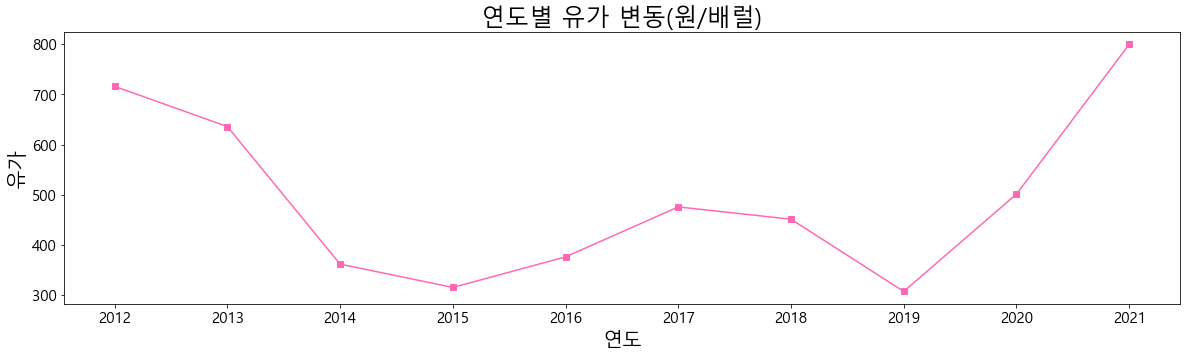

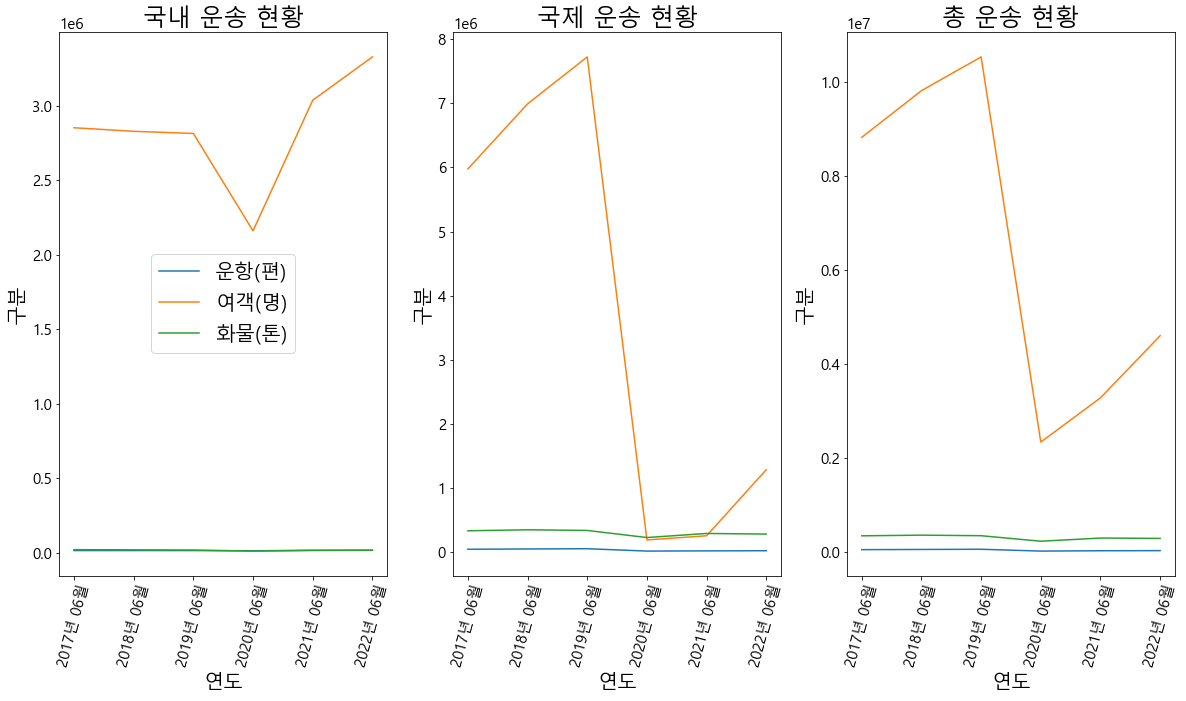

In [318]:
plt.figure(figsize=(20, 5))
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.show()

fig, axes = plt.subplots(1,3, figsize=(20,10))

plt.subplot(1,3,1)
# plt.figure(figsize=(15, 8))
plt.plot(inter_air_trans_2_01)
plt.title('국내 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
plt.legend(bbbb, fontsize=20, loc='center')

plt.subplot(1,3,2)
plt.plot(inter_air_trans_2_02)
plt.title('국제 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
# plt.legend(aaa, fontsize=15)

plt.subplot(1,3,3)
plt.plot(inter_air_trans_2_03)
plt.title('총 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
# plt.legend(aaa, fontsize=15)
plt.show()

### 분석
- 

## < 그래프 분석 >
## 1) 항공사  

### (1) 유가의 변동과 여객/화물/운항의 변동

In [157]:
inter_air_trans_1 = inter_air_trans
inter_air_trans_1

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,716.12,46920
1,2013,50986891,3246253,338988,635.94,49732
2,2014,56778759,3410742,366485,361.83,53777
3,2015,61434404,3518772,388008,315.39,56915
4,2016,73000810,3780908,438856,376.26,58591
5,2017,76955719,4031516,457099,475.87,59995
6,2018,85925288,4168783,497089,451.29,62045
7,2019,90385640,4015987,528243,307.39,62957
8,2020,14239922,3070993,167211,501.50,62212
9,2021,3208695,3420163,131442,799.83,68773


In [123]:
inter_air_trans_1['연도'] = inter_air_trans_1['연도'].astype('str')

In [131]:
b = inter_air_trans_1['연도'].tolist()
x1 = inter_air_trans_1['여객(명)'].tolist()
x2 = inter_air_trans_1['화물(톤)'].tolist()
x3 = inter_air_trans_1['운항(회)'].tolist()
o1 = inter_air_trans_1['유가(원/배럴)'].tolist()

In [321]:
b

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [322]:
o1

[716.12, 635.94, 361.83, 315.39, 376.26, 475.87, 451.29, 307.39, 501.5, 799.83]

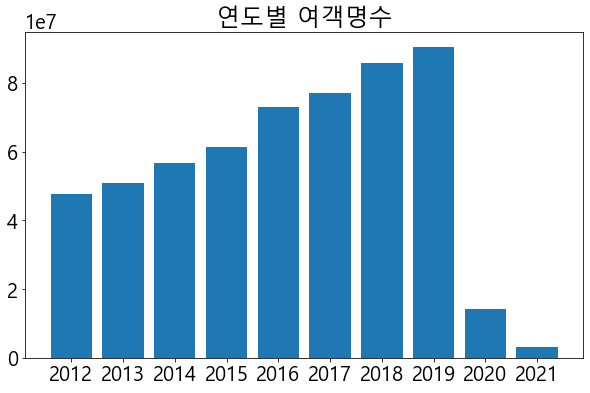

In [132]:
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    plt.rc('font', family=font_name)
# plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
else:
# MacOS
    plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS

plt.figure(figsize=(10, 6))
plt.title('연도별 여객명수')
plt.bar(b, x1)
plt.show()

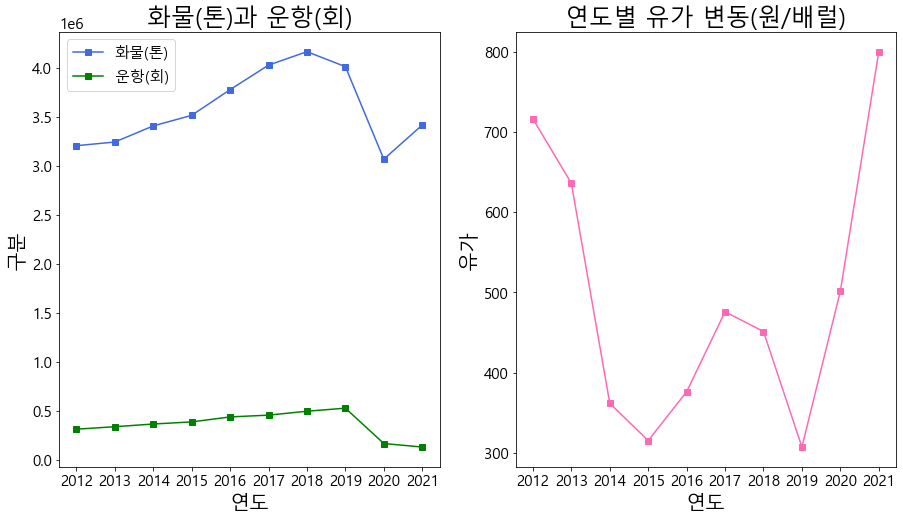

In [327]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(b, x2, 'royalblue', marker='s', label='화물(톤)')
plt.plot(b, x3, 'green', marker='s', label='운항(회)')
plt.rc('font', size=20)   
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.title('화물(톤)과 운항(회)')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.legend(fontsize=15)
# plt.show()

plt.subplot(1,2,2)
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.show()

### 분석
- 

## 2) 관광업

### (1) 업종별 사업체수/종사자수/매출액의 변동

In [274]:
inter_air_trans_1

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,716.12,46920
1,2013,50986891,3246253,338988,635.94,49732
2,2014,56778759,3410742,366485,361.83,53777
3,2015,61434404,3518772,388008,315.39,56915
4,2016,73000810,3780908,438856,376.26,58591
5,2017,76955719,4031516,457099,475.87,59995
6,2018,85925288,4168783,497089,451.29,62045
7,2019,90385640,4015987,528243,307.39,62957
8,2020,14239922,3070993,167211,501.50,62212
9,2021,3208695,3420163,131442,799.83,68773


In [275]:
x4 = inter_air_trans_1['숙박 업체수(개)'].tolist()

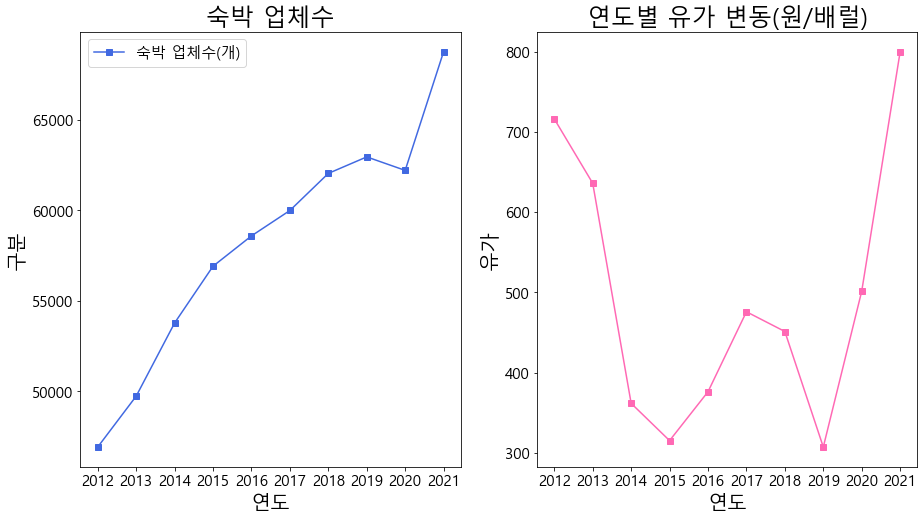

In [278]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(b, x4, 'royalblue', marker='s', label='숙박 업체수(개)')
plt.rc('font', size=20)   
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.title('숙박 업체수')
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.legend(fontsize=15)
# plt.show()

plt.subplot(1,2,2)
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.show()

### 분석
- 숙박 업체수는 유가와 관계없이 지속적인 상승을 하는 것으로 봐서 크게 연관성이 없는 것으로 판단됨

### (2) 업종별 사업체수/종사자수/매출액의 변동

In [202]:
# 업종별 사업체수
sightseeing_01 = sightseeing.iloc[0:20:3]
sightseeing_01

# 업종별 종사자수
sightseeing_02 = sightseeing.iloc[1:20:3]
sightseeing_02

# 업종별 매출액(억원)
sightseeing_03 = sightseeing.iloc[2:20:3]
sightseeing_03

,업종,구분,2016,2017,2018,2019,2020
2,여행업,매출액(억원),76427,81134,84622,86271,4354
5,관광숙박업,매출액(억원),82683,84112,76644,83628,39613
8,관광객 이용시설업,매출액(억원),8852,11039,10207,10837,6515
11,국제회의업,매출액(억원),18377,17715,13033,15273,3837
14,카지노업,매출액(억원),29033,27303,30254,29121,10413
17,유원시설업,매출액(억원),19292,20333,19709,21337,5569


In [206]:
# sightseeing_01.drop(['구분'],axis=1, inplace=True)
# sightseeing_02.drop(['구분'],axis=1, inplace=True)
# sightseeing_03.drop(['구분'],axis=1, inplace=True)

C:\Users\ahasu\AppData\Local\Temp\ipykernel_10164\846440347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sightseeing_01.drop(['구분'],axis=1, inplace=True)


In [221]:
# 컬럼명 수정
sightseeing_01 = sightseeing_01.rename({'업종':'연도'}, axis=1)
sightseeing_02 = sightseeing_02.rename({'업종':'연도'}, axis=1)
sightseeing_03 = sightseeing_03.rename({'업종':'연도'}, axis=1)

연도,여행업,관광숙박업,관광객 이용시설업,국제회의업,카지노업,유원시설업,관광편의시설업
2016,16605,1716,3168,700,17,1782,3708
2017,19944,1843,3963,890,17,2548,3884
2018,19039,2110,4323,886,17,3000,4077
2019,18223,2218,4657,1040,17,2981,4189
2020,16660,2223,6079,1110,17,2689,3237


In [229]:
# 행, 열 전환으로 연도를 인덱스로 지정
sightseeing_01 = sightseeing_01.set_index('연도').T
sightseeing_02 = sightseeing_02.set_index('연도').T
sightseeing_03 = sightseeing_03.set_index('연도').T

In [238]:
# 그래프를 그리기 위해 해당 컬럼을 리스트에 담기
aaa = sightseeing_01.columns.tolist()
bbb = sightseeing_02.columns.tolist()
ccc = sightseeing_03.columns.tolist()

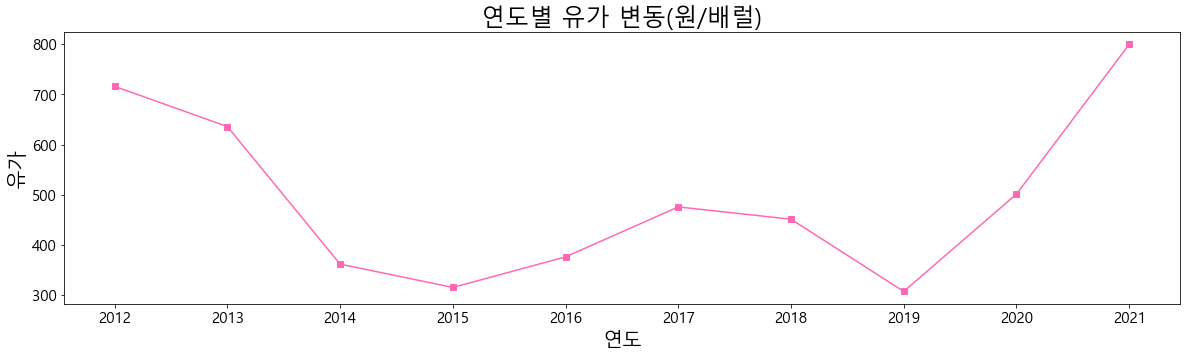

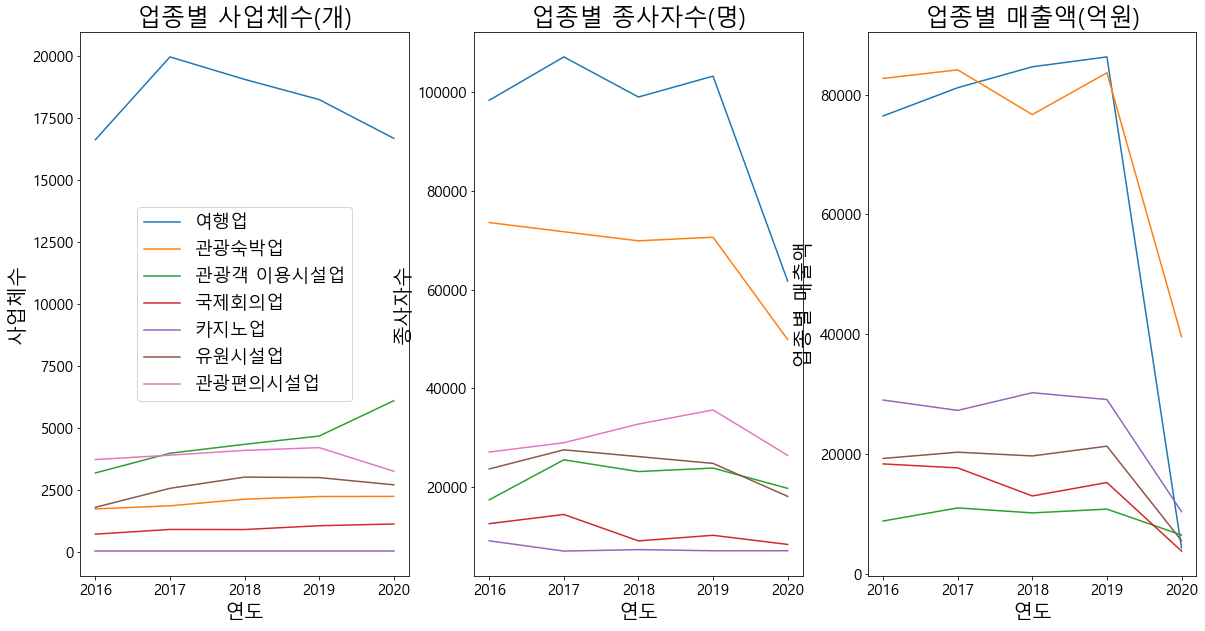

In [270]:
plt.figure(figsize=(20, 5))
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.show()

fig, axes = plt.subplots(1,3, figsize=(20,10))

plt.subplot(1,3,1)
# plt.figure(figsize=(15, 8))
plt.plot(sightseeing_01)
plt.title('업종별 사업체수(개)')
plt.ylabel('사업체수', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.legend(aaa, fontsize=18, loc='center')

plt.subplot(1,3,2)
plt.plot(sightseeing_02)
plt.title('업종별 종사자수(명)')
plt.ylabel('종사자수', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.legend(aaa, fontsize=15)

plt.subplot(1,3,3)
plt.plot(sightseeing_03)
plt.title('업종별 매출액(억원)')
plt.ylabel('업종별 매출액', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.legend(aaa, fontsize=15)
plt.show()

### 분석
- 

In [ ]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기